In [26]:
import numpy as np
import pandas as pd

In [27]:
# Load the dataset
df = pd.read_csv("WebTraffic_Q1_2025 - WebTraffic_Q1_2025.csv.csv")

# Preview the first few rows
df.shape

(600, 8)

In [28]:
# Check missing values
df.isna().sum()

df.dtypes

VisitDate           object
SessionDuration    float64
PageViews          float64
ReferralSource      object
DeviceType          object
Platform            object
BounceRate         float64
Conversions          int64
dtype: object

In [29]:
# # Handle missing values

# df["SessionDuration"] = df["SessionDuration"].fillna(df["SessionDuration"].mean())
# df["PageViews"] = df["PageViews"].fillna(df["PageViews"].mean())

# # Convert 'VisitDate' column to datetime
# df["VisitDate"] = pd.to_datetime(df["VisitDate"])

# # Extract Month and Year
# df["Month"] = df["VisitDate"].dt.month
# df["Year"] = df["VisitDate"].dt.year

# # Remove duplicates
# df.drop_duplicates(inplace=True)


In [30]:
# df.columns


In [31]:
# Handle missing values
df["SessionDuration"] = df["SessionDuration"].fillna(df["SessionDuration"].mean())
df["PageViews"] = df["PageViews"].fillna(df["PageViews"].mean())
df["BounceRate"] = df["BounceRate"].fillna(df["BounceRate"].mean())
df["Conversions"] = df["Conversions"].fillna(0)
df["ReferralSource"] = df["ReferralSource"].fillna("Unknown")
df["DeviceType"] = df["DeviceType"].fillna("Not Specified")
df["Platform"] = df["Platform"].fillna("Not Specified")

# Convert 'VisitDate' column to datetime
df["VisitDate"] = pd.to_datetime(df["VisitDate"], errors="coerce")

# Extract Month and Year
df["Month"] = df["VisitDate"].dt.month
df["Year"] = df["VisitDate"].dt.year

# Generate new meaningful columns
df["EngagementScore"] = df["SessionDuration"] * df["PageViews"]
df["ConversionRate"] = df["Conversions"] / df["PageViews"]

# Clean invalid or missing date rows
df = df.dropna(subset=["VisitDate"])

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)


In [32]:
df

,VisitDate,SessionDuration,PageViews,ReferralSource,DeviceType,Platform,BounceRate,Conversions,Month,Year,EngagementScore,ConversionRate
0,2025-03-17,140.78,3.0,Referral,Tablet,Windows,88.24,1,3,2025,422.34,0.333333
1,2025-01-03,903.04,3.0,Paid Search,Tablet,Windows,48.78,0,1,2025,2709.12,0.000000
2,2025-02-25,395.02,5.0,Social Media,Mobile,macOS,51.13,0,2,2025,1975.10,0.000000
3,2025-01-29,273.88,6.0,Referral,Desktop,macOS,60.36,0,1,2025,1643.28,0.000000
4,2025-03-23,50.89,5.0,Organic Search,Mobile,Linux,88.83,1,3,2025,254.45,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
595,2025-02-19,192.71,4.0,Organic Search,Mobile,Linux,58.28,0,2,2025,770.84,0.000000
596,2025-03-15,330.39,3.0,Social Media,Desktop,iOS,58.24,0,3,2025,991.17,0.000000
597,2025-01-14,56.74,6.0,Organic Search,Mobile,macOS,26.26,0,1,2025,340.44,0.000000
598,2025-01-14,64.07,4.0,Social Media,Mobile,macOS,49.26,0,1,2025,256.28,0.000000


In [33]:
df.isna().sum()

VisitDate          0
SessionDuration    0
PageViews          0
ReferralSource     0
DeviceType         0
Platform           0
BounceRate         0
Conversions        0
Month              0
Year               0
EngagementScore    0
ConversionRate     4
dtype: int64

In [34]:
df.dtypes

VisitDate          datetime64[ns]
SessionDuration           float64
PageViews                 float64
ReferralSource             object
DeviceType                 object
Platform                   object
BounceRate                float64
Conversions                 int64
Month                       int32
Year                        int32
EngagementScore           float64
ConversionRate            float64
dtype: object

In [35]:
# Summary statistics for numerical columns
summary_stats = df[['SessionDuration', 'PageViews', 'BounceRate', 'Conversions']].describe()
summary_stats

# df.describe()

,SessionDuration,PageViews,BounceRate,Conversions
count,600.000000,600.000000,600.000000,600.000000
mean,310.725578,4.944162,55.129400,0.143333
std,307.543532,2.254714,20.421366,0.350705
min,1.520000,0.000000,20.500000,0.000000
25%,85.865000,3.000000,36.917500,0.000000
50%,222.015000,5.000000,55.350000,0.000000
75%,432.522500,6.000000,72.657500,0.000000
max,2451.730000,12.000000,89.950000,1.000000


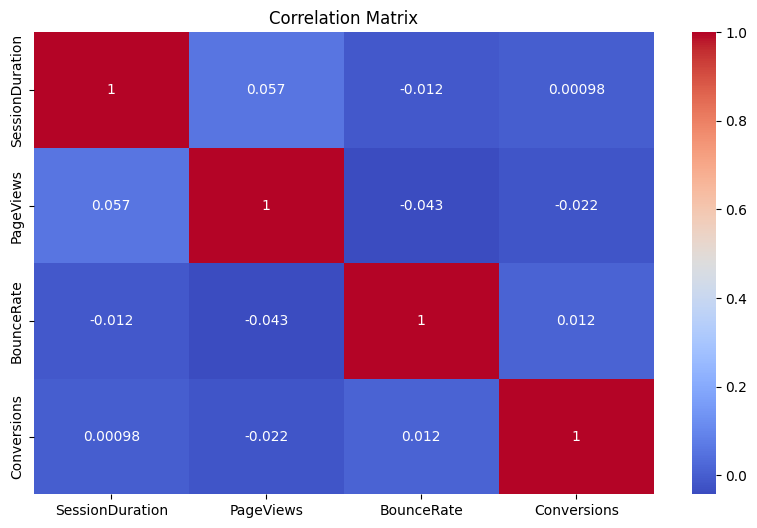

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix using numerical columns
correlation_matrix = df[['SessionDuration', 'PageViews', 'BounceRate', 'Conversions']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [37]:
top_referrals = df.groupby("ReferralSource")["Conversions"].sum().nlargest(5)
top_referrals


ReferralSource
Email           17
Direct          16
Referral        16
Paid Search     14
Social Media    12
Name: Conversions, dtype: int64

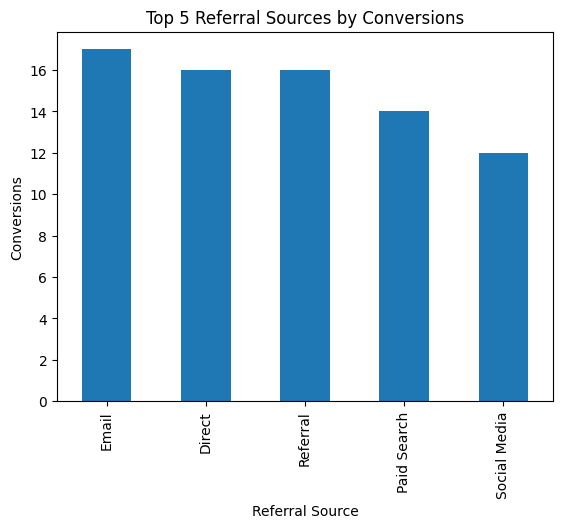

In [38]:
top_referrals.plot(kind='bar')
plt.title('Top 5 Referral Sources by Conversions')
plt.xlabel('Referral Source')
plt.ylabel('Conversions')
plt.show()


In [39]:
# Monthly conversions trend
monthly_conversions = df.groupby('Month')['Conversions'].sum()

monthly_conversions


Month
1    36
2    26
3    24
Name: Conversions, dtype: int64

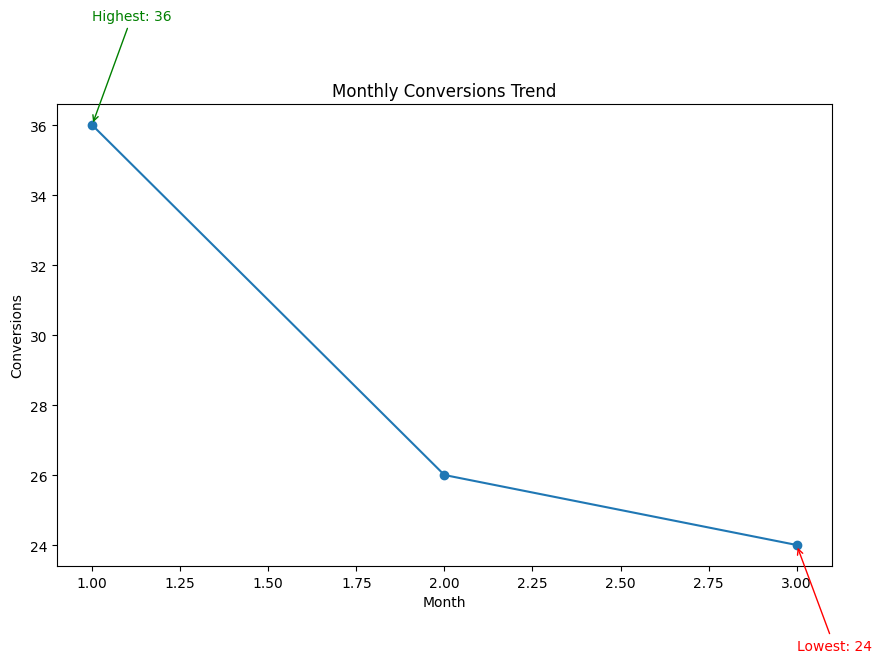

In [40]:
plt.figure(figsize=(10, 6))
monthly_conversions.plot(kind='line', marker='o')
plt.title('Monthly Conversions Trend')
plt.xlabel('Month')
plt.ylabel('Conversions')

max_month = monthly_conversions.idxmax()
min_month = monthly_conversions.idxmin()

plt.annotate(
    f'Highest: {monthly_conversions[max_month]}',
    xy=(max_month, monthly_conversions[max_month]),
    xytext=(max_month, monthly_conversions[max_month] + 3),
    arrowprops=dict(arrowstyle='->', color='green'),
    color='green'
)

plt.annotate(
    f'Lowest: {monthly_conversions[min_month]}',
    xy=(min_month, monthly_conversions[min_month]),
    xytext=(min_month, monthly_conversions[min_month] - 3),
    arrowprops=dict(arrowstyle='->', color='red'),
    color='red'
)

plt.show()


In [41]:
# Conversions by Platform
platform_conversions = df.groupby('Platform')['Conversions'].sum()

platform_conversions


Platform
Android    13
Linux      20
Windows    12
iOS        23
macOS      18
Name: Conversions, dtype: int64

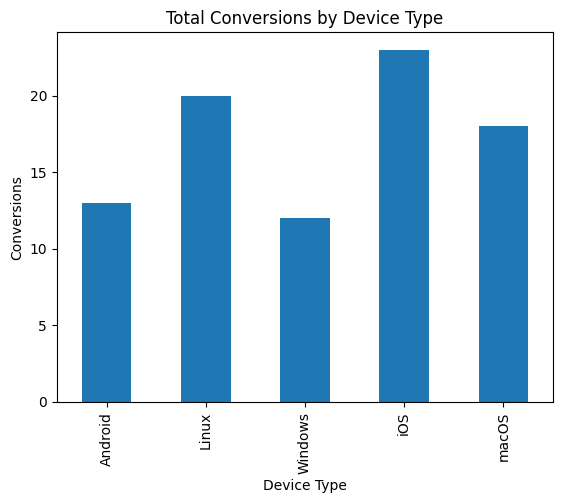

Highest conversions come from iOS with 23 conversions.


In [42]:
platform_conversions.plot(kind="bar")
plt.title("Total Conversions by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Conversions")
plt.show()

best_device = platform_conversions.idxmax()
best_value = platform_conversions.max()
print(f"Highest conversions come from {best_device} with {best_value} conversions.")


In [43]:
df

,VisitDate,SessionDuration,PageViews,ReferralSource,DeviceType,Platform,BounceRate,Conversions,Month,Year,EngagementScore,ConversionRate
0,2025-03-17,140.78,3.0,Referral,Tablet,Windows,88.24,1,3,2025,422.34,0.333333
1,2025-01-03,903.04,3.0,Paid Search,Tablet,Windows,48.78,0,1,2025,2709.12,0.000000
2,2025-02-25,395.02,5.0,Social Media,Mobile,macOS,51.13,0,2,2025,1975.10,0.000000
3,2025-01-29,273.88,6.0,Referral,Desktop,macOS,60.36,0,1,2025,1643.28,0.000000
4,2025-03-23,50.89,5.0,Organic Search,Mobile,Linux,88.83,1,3,2025,254.45,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
595,2025-02-19,192.71,4.0,Organic Search,Mobile,Linux,58.28,0,2,2025,770.84,0.000000
596,2025-03-15,330.39,3.0,Social Media,Desktop,iOS,58.24,0,3,2025,991.17,0.000000
597,2025-01-14,56.74,6.0,Organic Search,Mobile,macOS,26.26,0,1,2025,340.44,0.000000
598,2025-01-14,64.07,4.0,Social Media,Mobile,macOS,49.26,0,1,2025,256.28,0.000000


In [44]:
# User Behavior Classification (based on available columns)
user_behavior = df.groupby('DeviceType').agg({
    'SessionDuration': 'count',
    'PageViews': 'mean'
}).rename(columns={
    'SessionDuration': 'SessionCount',
    'PageViews': 'AvgPageViews'
})

user_behavior


,SessionCount,AvgPageViews
DeviceType,,
Desktop,195,4.968658
Mobile,206,5.208738
Tablet,199,4.646277


In [45]:
# Customer Behavior Classification (Platform wise)
customer_data = df.groupby('Platform').agg({
    'PageViews': 'count',
    'Conversions': 'mean'
}).rename(columns={
    'PageViews': 'VisitFrequency',
    'Conversions': 'AvgConversionRate'
})

customer_data


,VisitFrequency,AvgConversionRate
Platform,,
Android,96,0.135417
Linux,124,0.161290
Windows,107,0.112150
iOS,136,0.169118
macOS,137,0.131387


In [46]:
# Manual classification
def classify_customer(row):
    if row['AvgConversionRate'] >= 0.5 and row['VisitFrequency'] >= 5:
        return 'High Value'
    elif row['AvgConversionRate'] >= 0.2:
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply classification
customer_data['Category'] = customer_data.apply(classify_customer, axis=1)

customer_data

# Count category-wise platforms
category_counts = customer_data['Category'].value_counts()

category_counts


Category
Low Value    5
Name: count, dtype: int64

In [47]:
customer_data

,VisitFrequency,AvgConversionRate,Category
Platform,,,
Android,96,0.135417,Low Value
Linux,124,0.161290,Low Value
Windows,107,0.112150,Low Value
iOS,136,0.169118,Low Value
macOS,137,0.131387,Low Value


In [48]:
# Customer Behavior Classification (using available columns)
customer_data = df.groupby('ReferralSource').agg({
    'Conversions': 'sum',
    'PageViews': 'mean'
}).rename(columns={
    'Conversions': 'PurchaseFrequency',
    'PageViews': 'AvgOrderValue'
})

# Manual classification
def classify_customer(row):
    if row['AvgOrderValue'] >= 10 and row['PurchaseFrequency'] >= 50:
        return 'High Value'
    elif row['AvgOrderValue'] >= 5:
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply classification
customer_data['Category'] = customer_data.apply(classify_customer, axis=1)

customer_data

# Count customers in each category
category_counts = customer_data['Category'].value_counts()
category_counts


Category
Low Value       4
Medium Value    2
Name: count, dtype: int64

Low Value sources: 4
Medium Value sources: 2


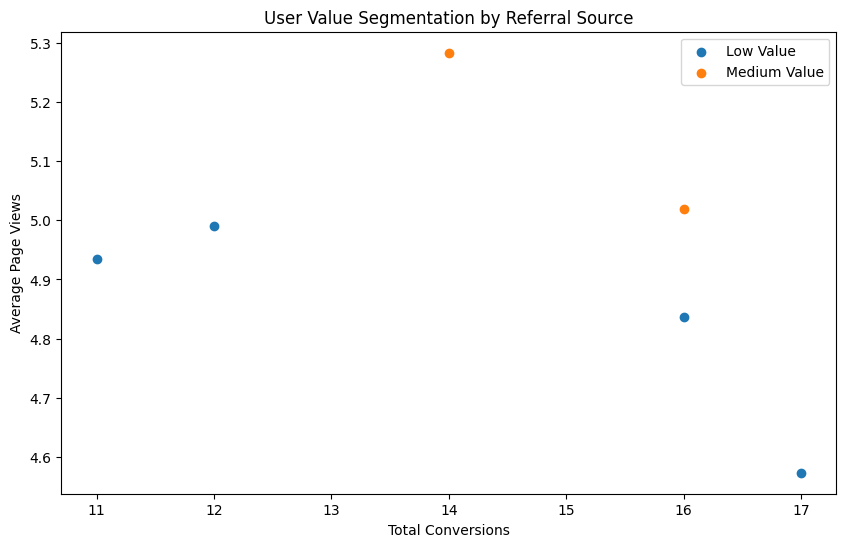

In [49]:
# Scatter plot
plt.figure(figsize=(10, 6))

for label, group in customer_data.groupby('Category'):
    print(f'{label} sources: {len(group)}')
    plt.scatter(group['PurchaseFrequency'], group['AvgOrderValue'], label=label)

plt.xlabel('Total Conversions')
plt.ylabel('Average Page Views')
plt.title('User Value Segmentation by Referral Source')
plt.legend()
plt.show()

# customer_data.groupby("Category")["AvgOrderValue"].sum()
